# <ins> Futuristic Airbnb ETL </ins>
<hr>

 <b>
Airbnb is a home-sharing platform, which provides a platform for hosts to accommodate guests with short-term lodging and tourism-related activities. Guest3s can search for lodging using filters such as lodging type, dates, location, and price Guests have the ability to search for specific types of homes, such as bed and breakfasts, unique homes, and vacation homes before booking, users must provide personal and payment information. Some hosts also require a scan of government-issued identification before accepting a reservation Guests have the ability to chat with hosts through a secure messaging system Hosts provide prices and other details for their rental or event listings, such as the allowed number of guests, home type, rules, and amenities. The host, with recommendations from Airbnb, determines pricing. Hosts and guests have the ability to leave reviews about the experience. 
</b>

<hr>

### <ins> Project Goal </ins>

(ETL) is the general procedure of copying data from one or more sources into a destination system, which represents the data differently from the source(s) or in a different context than the source(s).<br>

Our Project Aim is to perform the below activities as part of ETL phase.
<b> <br>
    <br>
	Extract is the process of extracting data from multiple and different types of sources. <br>

	Transform is the process of converting the extracted data from its previous form into the form it needs to be in so that it can be placed into a target database. Transformation occurs by using rules or lookup tables or by combining the data with other data. <br>

	Load is the process of writing the data into the target database.
</b>

<hr>

### Data Set 

The Data Set Used for the Project: <br><br>
	<b>Source Data </b> <br><br>
•	http://insideairbnb.com/about.html <br>
•	https://www.kaggle.com/datasets <br>

<b> API Data </b> <br><br>
	https://api.yelp.com/v3/businesses/search <br>
	https://maps.googleapis.com/maps/api/geocode/json? <br>

The Data Files used for this project is as below.<br><br> <b>
•	listings.csv  This file contains about the Airbnb Host, listing and Property Information’s. It also contains about the reviews scores & availability details of the property. <br>
•	reviews.csv  This file contains about the review information of the property. <br>
•	calendar.csv  This file contains about the Property availability and its price information for the future year.  <br><br>
We have used the yelp and google api to retrieve the top ratings restaurants/café/bars dor each listing.


### <ins> Tables & Files Details </ins>

<b> <ins> listings.csv </ins> </b>

Futuristic_Airbnb_Hosts <br>
Futuristic_Airbnb_Listings_Property <br>
Futuristic_Airbnb_Property_Address <br>
Futuristic_Airbnb_Property_Availability <br>
Futuristic_Airbnb_Property_Reviews <br>
Futuristic_Airbnb_Hawaii_RCB <br>

<b> <ins>  reviews.csb </ins> </b>

Futuristic_Airbnb_Property_Reviews <br>

<b> <ins>  calendar.csv </ins> </b>

Futuristic_Airbnb_Calendar <br>

<b> <ins>  Yelp & Google API </ins> </b> <br/>
Futuristic_Airbnb_Hawaii_RCB
<hr>

In [2]:
#Importing Dependencies

import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import re
import json
import requests
import gmaps
import gmaps
import gmaps.datasets

### <ins> Store Listings CSV into DataFrame </ins>

In [3]:
Original_Listings_df = pd.read_csv("../Dataset-ETL/Hawaii/listings.csv", encoding="utf8")
Original_Listings_df.head()

C:\Users\Saranya\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (61,62,95) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3002,https://www.airbnb.com/rooms/3002,20190912153025,2019-09-12,"OCEAN VIEW 1BLK2BEACH,LANAI A/C,FULL KITCH,CEN...",women or couples only. No men alone. Will Dedu...,"**Aloha! I live in a nice, small one bedroom u...",women or couples only. No men alone. Will Dedu...,none,Waikiki has nice weather 90% percent if the ye...,...,f,f,strict_14_with_grace_period,f,f,1,0,1,0,2.09
1,5065,https://www.airbnb.com/rooms/5065,20190912153025,2019-09-12,MAUKA BB,"Perfect for your vacation, Staycation or just ...",Mauka B & B is 400 square feet studio with a p...,"Perfect for your vacation, Staycation or just ...",none,Neighbors here are friendly but are not really...,...,f,f,moderate,f,f,2,2,0,0,0.46
2,5269,https://www.airbnb.com/rooms/5269,20190912153025,2019-09-12,Upcountry Hospitality in the 'Auwai Suite,"The 'Auwai Suite is a lovely, self-contained a...","The ‘Auwai Suite is a lovely, self-contained a...","The 'Auwai Suite is a lovely, self-contained a...",none,"We are located on the ""sunny side"" of Waimea, ...",...,t,f,strict_14_with_grace_period,f,f,7,4,2,0,0.05
3,5387,https://www.airbnb.com/rooms/5387,20190912153025,2019-09-12,Hale Koa Studio & 1 Bedroom Units!!,This Wonderful Spacious Studio apt/flat is in ...,"Hale Koa Duplex: This duplex has a wonderful, ...",This Wonderful Spacious Studio apt/flat is in ...,none,IN a Farm belt area with small commercial farm...,...,t,f,strict_14_with_grace_period,f,f,3,3,0,0,1.36
4,5389,https://www.airbnb.com/rooms/5389,20190912153025,2019-09-12,Keauhou Villa,It is less than 10 minute walk to the Keauhou ...,"Location: Keauhou, Kona Coast, Big Island, Haw...",It is less than 10 minute walk to the Keauhou ...,none,It is less than 10 minute walk to the Keauhou ...,...,f,f,flexible,f,f,3,3,0,0,0.21


### Making a Copy of the Original DataFrame to Listings_df

In [4]:
Listings_df = Original_Listings_df.copy()

In [5]:
Listings_df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,3002,https://www.airbnb.com/rooms/3002,20190912153025,2019-09-12,"OCEAN VIEW 1BLK2BEACH,LANAI A/C,FULL KITCH,CEN...",women or couples only. No men alone. Will Dedu...,"**Aloha! I live in a nice, small one bedroom u...",women or couples only. No men alone. Will Dedu...,none,Waikiki has nice weather 90% percent if the ye...,...,f,f,strict_14_with_grace_period,f,f,1,0,1,0,2.09
1,5065,https://www.airbnb.com/rooms/5065,20190912153025,2019-09-12,MAUKA BB,"Perfect for your vacation, Staycation or just ...",Mauka B & B is 400 square feet studio with a p...,"Perfect for your vacation, Staycation or just ...",none,Neighbors here are friendly but are not really...,...,f,f,moderate,f,f,2,2,0,0,0.46
2,5269,https://www.airbnb.com/rooms/5269,20190912153025,2019-09-12,Upcountry Hospitality in the 'Auwai Suite,"The 'Auwai Suite is a lovely, self-contained a...","The ‘Auwai Suite is a lovely, self-contained a...","The 'Auwai Suite is a lovely, self-contained a...",none,"We are located on the ""sunny side"" of Waimea, ...",...,t,f,strict_14_with_grace_period,f,f,7,4,2,0,0.05
3,5387,https://www.airbnb.com/rooms/5387,20190912153025,2019-09-12,Hale Koa Studio & 1 Bedroom Units!!,This Wonderful Spacious Studio apt/flat is in ...,"Hale Koa Duplex: This duplex has a wonderful, ...",This Wonderful Spacious Studio apt/flat is in ...,none,IN a Farm belt area with small commercial farm...,...,t,f,strict_14_with_grace_period,f,f,3,3,0,0,1.36
4,5389,https://www.airbnb.com/rooms/5389,20190912153025,2019-09-12,Keauhou Villa,It is less than 10 minute walk to the Keauhou ...,"Location: Keauhou, Kona Coast, Big Island, Haw...",It is less than 10 minute walk to the Keauhou ...,none,It is less than 10 minute walk to the Keauhou ...,...,f,f,flexible,f,f,3,3,0,0,0.21


In [6]:
pd.set_option('display.max_columns', len(Listings_df.columns)) 
pd.set_option('display.max_rows', 1000)

In [7]:
#Determining the Null Value Data from the main dataset
round(( Listings_df.isna().sum()/len(Listings_df) ) * 100).sort_values(ascending=False)

xl_picture_url                                  100.0
thumbnail_url                                   100.0
host_acceptance_rate                            100.0
jurisdiction_names                              100.0
medium_url                                      100.0
square_feet                                      99.0
monthly_price                                    95.0
weekly_price                                     94.0
license                                          56.0
transit                                          47.0
access                                           45.0
neighborhood_overview                            43.0
interaction                                      43.0
notes                                            41.0
house_rules                                      29.0
host_about                                       28.0
review_scores_value                              25.0
review_scores_location                           25.0
review_scores_communication 

### Dropping Unneccessary/Similar/Null Columns(Greater than 90%) from the Listings Data frame

In [8]:
Listings_df = Listings_df.drop (['square_feet','weekly_price','monthly_price','scrape_id','last_scraped','space',
                                 'experiences_offered','notes','interaction','thumbnail_url','medium_url','picture_url',
                                 'xl_picture_url','host_acceptance_rate','host_total_listings_count','host_verifications',
                                 'minimum_minimum_nights','maximum_minimum_nights','minimum_maximum_nights',
                                 'maximum_maximum_nights','minimum_nights_avg_ntm','maximum_nights_avg_ntm','calendar_updated',
                                 'calendar_last_scraped','license','jurisdiction_names','calculated_host_listings_count',
                                 'calculated_host_listings_count_entire_homes','calculated_host_listings_count_private_rooms',
                                 'calculated_host_listings_count_shared_rooms','neighborhood_overview'], axis =1)


<hr>

### <ins>Futuristic_Airbnb_Hosts_df </ins>

### Creating New data frame for Host Related Columns

In [157]:
Futuristic_Airbnb_Hosts_df = Listings_df[["host_id","host_url","host_name","host_about","host_since","host_location","host_response_time",
                                          "host_response_rate","host_is_superhost","host_thumbnail_url","host_picture_url",
                                          "host_listings_count","host_has_profile_pic","host_neighbourhood",
                                          "host_identity_verified"]].copy()
Futuristic_Airbnb_Hosts_df.head()

,host_id,host_url,host_name,host_about,host_since,host_location,host_response_time,host_response_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_listings_count,host_has_profile_pic,host_neighbourhood,host_identity_verified
0,3364,https://www.airbnb.com/users/show/3364,Lynne,"ME--:)I enjoy Socializing, concerts, just chil...",2008-09-30,"Honolulu, Hawaii, United States",within a few hours,90%,f,https://a0.muscache.com/im/pictures/2844d5ce-8...,https://a0.muscache.com/im/pictures/2844d5ce-8...,1.0,t,Waikiki,t
1,7257,https://www.airbnb.com/users/show/7257,Wayne,HI\r\nWE LIVE HERE IN HONOKAA ON \r\nFARM JUS...,2009-01-31,hawaii,within a few hours,100%,f,https://a0.muscache.com/im/users/7257/profile_...,https://a0.muscache.com/im/users/7257/profile_...,2.0,t,Hamakua Coast,f
2,7620,https://www.airbnb.com/users/show/7620,Lea & Pat,"Lea, born and raised on the Island of Hawaii, ...",2009-02-09,"Waimea, Hawaii, United States",within an hour,90%,f,https://a0.muscache.com/im/pictures/user/16ac6...,https://a0.muscache.com/im/pictures/user/16ac6...,7.0,t,Island of Hawaiʻi,f
3,7878,https://www.airbnb.com/users/show/7878,Edward,"Kona Hawaii,\r\n \r\n Ed is a Farmer/Designer ...",2009-02-13,"Captain Cook, Hawaii, United States",within an hour,100%,f,https://a0.muscache.com/im/pictures/b895b9d9-e...,https://a0.muscache.com/im/pictures/b895b9d9-e...,3.0,t,Kailua/Kona,t
4,7878,https://www.airbnb.com/users/show/7878,Edward,"Kona Hawaii,\r\n \r\n Ed is a Farmer/Designer ...",2009-02-13,"Captain Cook, Hawaii, United States",within an hour,100%,f,https://a0.muscache.com/im/pictures/b895b9d9-e...,https://a0.muscache.com/im/pictures/b895b9d9-e...,3.0,t,Kailua/Kona,t


In [158]:
#Checking the Number of Rows
len(Futuristic_Airbnb_Hosts_df)

23452

### Cleaning the Host DataFrame

In [159]:
#Checking if any Null Value Data in Host Related Columns
round(( Futuristic_Airbnb_Hosts_df.isna().sum()/len(Futuristic_Airbnb_Hosts_df) ) * 100).sort_values(ascending=False)

host_about                28.0
host_neighbourhood        18.0
host_response_rate         5.0
host_response_time         5.0
host_identity_verified     0.0
host_has_profile_pic       0.0
host_listings_count        0.0
host_picture_url           0.0
host_thumbnail_url         0.0
host_is_superhost          0.0
host_location              0.0
host_since                 0.0
host_name                  0.0
host_url                   0.0
host_id                    0.0
dtype: float64

In [160]:
#Filling N/A Values With Some Relevant Values
Futuristic_Airbnb_Hosts_df["host_about"].fillna("Information Not Available", inplace = True) 
Futuristic_Airbnb_Hosts_df["host_neighbourhood"].fillna("Information Not Available", inplace = True) 
Futuristic_Airbnb_Hosts_df["host_response_rate"].fillna("0%", inplace = True) 
Futuristic_Airbnb_Hosts_df["host_response_time"].fillna("Information Not Available", inplace = True) 

In [161]:
#Re-Checking if any Null Value Data in Host Related Columns
round(( Futuristic_Airbnb_Hosts_df.isna().sum()/len(Futuristic_Airbnb_Hosts_df) ) * 100).sort_values(ascending=False)

host_identity_verified    0.0
host_neighbourhood        0.0
host_has_profile_pic      0.0
host_listings_count       0.0
host_picture_url          0.0
host_thumbnail_url        0.0
host_is_superhost         0.0
host_response_rate        0.0
host_response_time        0.0
host_location             0.0
host_since                0.0
host_about                0.0
host_name                 0.0
host_url                  0.0
host_id                   0.0
dtype: float64

In [162]:
#Removing % in Host Response Rate Column and converting to Numeric
Futuristic_Airbnb_Hosts_df['host_response_rate'] = pd.to_numeric(Futuristic_Airbnb_Hosts_df.host_response_rate.str.strip('%'))


In [163]:
# Coverting boolean related columns to boolean values as mysql
Futuristic_Airbnb_Hosts_df["host_is_superhost"].replace(["t","f"],[True,False],inplace=True)
Futuristic_Airbnb_Hosts_df["host_has_profile_pic"].replace(["t","f"],[True,False],inplace=True)
Futuristic_Airbnb_Hosts_df["host_identity_verified"].replace(["t","f"],[True,False],inplace=True)

In [164]:
#Data Cleanup for Host_Since Column : Converting to DateTime Column

Futuristic_Airbnb_Hosts_df.host_since = pd.to_datetime(Futuristic_Airbnb_Hosts_df.host_since)

In [165]:
#Data Cleanup for Host_About Column

Futuristic_Airbnb_Hosts_df["host_about"]=Futuristic_Airbnb_Hosts_df["host_about"].replace({'\n': '', '\r':''}, regex=True)

In [166]:
#Data Cleanup for Host_Location Column
Futuristic_Airbnb_Hosts_df["host_location"]=Futuristic_Airbnb_Hosts_df["host_location"].replace({'Traveling across the country and when I\'m not doing that, at my home on' :'','I\'m your neighbor at the other end of the building':'Location not Available',', where the volcanoes are active and alive!':'','We live in Ko Olina a short walk to the Villas we own and rent':'Ko Olina'}, regex=True)
Futuristic_Airbnb_Hosts_df["host_location"]=Futuristic_Airbnb_Hosts_df["host_location"].replace({'US' :'United States','CA' :'Canada','JP':'Japan','CN':'China','AU':'Australia','KR':'Korea','BS':'Bahamas (the)','VN':'Viet Nam','VI':'Virgin Islands','NL':'Netherlands','HU':'Hungary','FR':'France','GR':'Greece','NZ':'New Zealand'}, regex=True)
Futuristic_Airbnb_Hosts_df["host_location"]=Futuristic_Airbnb_Hosts_df["host_location"].replace({'Californa':'California','I live 1/2 the time on Kaua\'i and the other half with my family in Lost Angeles':'Kauai/Los Angeles',' near Honokaa, 1/2 mile to Waipio lookout, Hamakua Coast, Big Island' : '','96727\nWe are on Rt. 240 the road from Honokaa to Waipio Valley. We are just a few houses before the 6 mile marker on the right.':'','I live in Waikola on the Big Island of Hawaii. The Village sits in the middle of black lava fields formed from Mauna Loa long ago.':'Waikola, Hawaii'}, regex=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027884301160>,
      dtype=object)

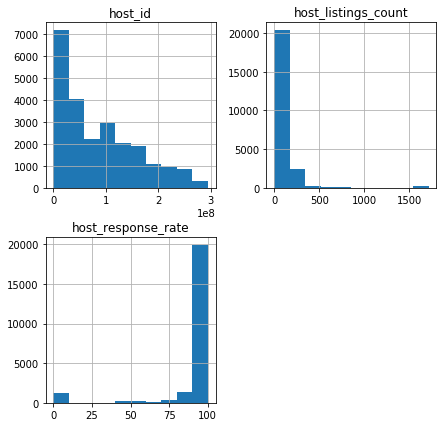

In [167]:
#Checking if Numerical Values are accurate
Futuristic_Airbnb_Hosts_df.hist(figsize=(7,7))

In [168]:
# Dropping the duplicates in Futuristic_Airbnb_Hosts_df data frame

Futuristic_Airbnb_Hosts_df = Futuristic_Airbnb_Hosts_df.drop_duplicates(keep="first")

Futuristic_Airbnb_Hosts_df = Futuristic_Airbnb_Hosts_df.reset_index(drop=True)

In [169]:
Futuristic_Airbnb_Hosts_df.head()

,host_id,host_url,host_name,host_about,host_since,host_location,host_response_time,host_response_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_listings_count,host_has_profile_pic,host_neighbourhood,host_identity_verified
0,3364,https://www.airbnb.com/users/show/3364,Lynne,"ME--:)I enjoy Socializing, concerts, just chil...",2008-09-30,"Honolulu, Hawaii, United States",within a few hours,90,False,https://a0.muscache.com/im/pictures/2844d5ce-8...,https://a0.muscache.com/im/pictures/2844d5ce-8...,1.0,True,Waikiki,True
1,7257,https://www.airbnb.com/users/show/7257,Wayne,HIWE LIVE HERE IN HONOKAA ON FARM JUST LISTEN...,2009-01-31,hawaii,within a few hours,100,False,https://a0.muscache.com/im/users/7257/profile_...,https://a0.muscache.com/im/users/7257/profile_...,2.0,True,Hamakua Coast,False
2,7620,https://www.airbnb.com/users/show/7620,Lea & Pat,"Lea, born and raised on the Island of Hawaii, ...",2009-02-09,"Waimea, Hawaii, United States",within an hour,90,False,https://a0.muscache.com/im/pictures/user/16ac6...,https://a0.muscache.com/im/pictures/user/16ac6...,7.0,True,Island of Hawaiʻi,False
3,7878,https://www.airbnb.com/users/show/7878,Edward,"Kona Hawaii, Ed is a Farmer/Designer We are f...",2009-02-13,"Captain Cook, Hawaii, United States",within an hour,100,False,https://a0.muscache.com/im/pictures/b895b9d9-e...,https://a0.muscache.com/im/pictures/b895b9d9-e...,3.0,True,Kailua/Kona,True
4,7887,https://www.airbnb.com/users/show/7887,Todd,Information Not Available,2009-02-14,"Bonita, California, United States",within a few hours,100,False,https://a0.muscache.com/im/pictures/82631f6a-f...,https://a0.muscache.com/im/pictures/82631f6a-f...,2.0,True,Kauaʻi,False


In [170]:
#Checking the Number of Rows in Futuristic_Airbnb_Hosts_df
len(Futuristic_Airbnb_Hosts_df)

8160

<hr>

### <ins>Futuristic_Airbnb_Listings_Property_df </ins> <hr>

### <ins>Creating New data frame for Listing & Property Related Columns</ins>

In [171]:
Futuristic_Airbnb_Listings_Property_df=Listings_df[['id','host_id','listing_url','name','summary','description','transit','access',
                                 'house_rules','property_type','room_type','accommodates','bathrooms',
                                 'bedrooms','beds','bed_type','amenities','price','security_deposit','cleaning_fee','guests_included',
                                  'extra_people','minimum_nights','maximum_nights','requires_license',
                                 'instant_bookable','is_business_travel_ready','cancellation_policy',
                                  'require_guest_profile_picture','require_guest_phone_verification']].copy()

In [172]:
Futuristic_Airbnb_Listings_Property_df.head()

,id,host_id,listing_url,name,summary,description,transit,access,house_rules,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
0,3002,3364,https://www.airbnb.com/rooms/3002,"OCEAN VIEW 1BLK2BEACH,LANAI A/C,FULL KITCH,CEN...",women or couples only. No men alone. Will Dedu...,women or couples only. No men alone. Will Dedu...,Bus right out front goes everywhere.,"Pool on 4th floor, laundry in basement.",Only house rules: No shoes on carpet ( ok if y...,Condominium,Private room,2,1.0,1.0,1.0,Futon,"{TV,""Cable TV"",Internet,""Air conditioning"",Poo...",$69.00,NaN,$45.00,1,$10.00,1,3,t,f,f,strict_14_with_grace_period,f,f
1,5065,7257,https://www.airbnb.com/rooms/5065,MAUKA BB,"Perfect for your vacation, Staycation or just ...","Perfect for your vacation, Staycation or just ...",There is a bus stop located in Honoka'a town ...,A BBQ grill is available,No smoking indoors and No pets allowed.,Bed and breakfast,Entire home/apt,2,1.0,0.0,1.0,Real Bed,"{""Cable TV"",Internet,Wifi,""Free parking on pre...",$85.00,NaN,NaN,2,$50.00,2,700,t,f,f,moderate,f,f
2,5269,7620,https://www.airbnb.com/rooms/5269,Upcountry Hospitality in the 'Auwai Suite,"The 'Auwai Suite is a lovely, self-contained a...","The 'Auwai Suite is a lovely, self-contained a...",One parking spot is provided with your stay.,You'll have access to your private garden suit...,NaN,Apartment,Entire home/apt,2,1.0,1.0,0.0,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,""Free parking on p...",$97.00,$0.00,$50.00,2,$10.00,2,186,t,t,f,strict_14_with_grace_period,f,f
3,5387,7878,https://www.airbnb.com/rooms/5387,Hale Koa Studio & 1 Bedroom Units!!,This Wonderful Spacious Studio apt/flat is in ...,This Wonderful Spacious Studio apt/flat is in ...,"Close to Major highway (belt road) accessable,...","entire apartment, with full kitchen, baths an...",* Absolutely NO Smoking inside the house. * R...,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Free par...",$92.00,$0.00,$75.00,2,$15.00,5,60,t,t,f,strict_14_with_grace_period,f,f
4,5389,7878,https://www.airbnb.com/rooms/5389,Keauhou Villa,It is less than 10 minute walk to the Keauhou ...,It is less than 10 minute walk to the Keauhou ...,It is less than 10 minute walk to the Keauhou ...,"Entire House with Garage, Screened Lanai, Fron...","as at your own home, in a residential area",House,Entire home/apt,6,3.0,3.0,4.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$299.00,$300.00,$245.00,2,$30.00,6,180,t,f,f,flexible,f,f


In [173]:
len(Futuristic_Airbnb_Listings_Property_df)

23452

### <ins> Cleaning the Data Frame </ins>

In [174]:
#Determining the Percentage of Null Value Data
round(( Futuristic_Airbnb_Listings_Property_df.isna().sum()/len(Futuristic_Airbnb_Listings_Property_df) ) * 100).sort_values(ascending=False)

transit                             47.0
access                              45.0
house_rules                         29.0
security_deposit                    18.0
cleaning_fee                         7.0
summary                              3.0
description                          1.0
require_guest_phone_verification     0.0
bedrooms                             0.0
host_id                              0.0
listing_url                          0.0
name                                 0.0
property_type                        0.0
room_type                            0.0
accommodates                         0.0
bathrooms                            0.0
beds                                 0.0
require_guest_profile_picture        0.0
bed_type                             0.0
amenities                            0.0
price                                0.0
guests_included                      0.0
extra_people                         0.0
minimum_nights                       0.0
maximum_nights  

In [175]:
Futuristic_Airbnb_Listings_Property_df.update(Futuristic_Airbnb_Listings_Property_df[["transit","access","house_rules","summary","description"]].fillna("Information Not Available"))
Futuristic_Airbnb_Listings_Property_df.update(Futuristic_Airbnb_Listings_Property_df[["security_deposit","cleaning_fee"]].fillna("$0.00"))

In [176]:
#Re-Checking
round(( Futuristic_Airbnb_Listings_Property_df.isna().sum()/len(Futuristic_Airbnb_Listings_Property_df) ) * 100).sort_values(ascending=False)

require_guest_phone_verification    0.0
require_guest_profile_picture       0.0
host_id                             0.0
listing_url                         0.0
name                                0.0
summary                             0.0
description                         0.0
transit                             0.0
access                              0.0
house_rules                         0.0
property_type                       0.0
room_type                           0.0
accommodates                        0.0
bathrooms                           0.0
bedrooms                            0.0
beds                                0.0
bed_type                            0.0
amenities                           0.0
price                               0.0
security_deposit                    0.0
cleaning_fee                        0.0
guests_included                     0.0
extra_people                        0.0
minimum_nights                      0.0
maximum_nights                      0.0


In [177]:
#Price & Security Deposit , Cleaning & extra Column Data cleanup
Futuristic_Airbnb_Listings_Property_df["price"] = pd.to_numeric( Futuristic_Airbnb_Listings_Property_df["price"].replace({'\$': '', ',': ''}, regex=True))
Futuristic_Airbnb_Listings_Property_df["security_deposit"] = pd.to_numeric( Futuristic_Airbnb_Listings_Property_df["security_deposit"].replace({'\$': '', ',': ''}, regex=True))
Futuristic_Airbnb_Listings_Property_df["cleaning_fee"] = pd.to_numeric( Futuristic_Airbnb_Listings_Property_df["cleaning_fee"].replace({'\$': '', ',': ''}, regex=True))
Futuristic_Airbnb_Listings_Property_df["extra_people"] = pd.to_numeric( Futuristic_Airbnb_Listings_Property_df["extra_people"].replace({'\$': '', ',': ''}, regex=True))


In [178]:
#cancellation_policy column data cleanup
Futuristic_Airbnb_Listings_Property_df.cancellation_policy.replace({
    'strict_14_with_grace_period' : 'strict',
    'super_strict_30': 'strict',
    'super_strict_60': 'strict',
    'luxury_moderate': 'moderate',
    'luxury_super_strict_95':'strict',
    'luxury_super_strict_125':'strict',
    'luxury_no_refund':'strict'
    }, inplace=True)
Futuristic_Airbnb_Listings_Property_df.cancellation_policy.value_counts()

strict      18468
moderate     2722
flexible     2260
Name: cancellation_policy, dtype: int64

In [179]:
Futuristic_Airbnb_Listings_Property_df.amenities.head()

0    {TV,"Cable TV",Internet,"Air conditioning",Poo...
1    {"Cable TV",Internet,Wifi,"Free parking on pre...
2    {TV,"Cable TV",Wifi,Kitchen,"Free parking on p...
3    {TV,"Cable TV",Internet,Wifi,Kitchen,"Free par...
4    {TV,"Cable TV",Internet,Wifi,"Air conditioning...
Name: amenities, dtype: object

In [180]:
#Amenities Column Data Cleanup

Futuristic_Airbnb_Listings_Property_df.amenities=Futuristic_Airbnb_Listings_Property_df.amenities.str.replace("{",'')
Futuristic_Airbnb_Listings_Property_df.amenities=Futuristic_Airbnb_Listings_Property_df.amenities.str.replace('"','')
Futuristic_Airbnb_Listings_Property_df.amenities=Futuristic_Airbnb_Listings_Property_df.amenities.str.replace('}','')

In [181]:
Futuristic_Airbnb_Listings_Property_df["amenities"].replace(['{','"','}'],['','',''],inplace=True)

In [182]:
Futuristic_Airbnb_Listings_Property_df["amenities"].head()


0    TV,Cable TV,Internet,Air conditioning,Pool,Kit...
1    Cable TV,Internet,Wifi,Free parking on premise...
2    TV,Cable TV,Wifi,Kitchen,Free parking on premi...
3    TV,Cable TV,Internet,Wifi,Kitchen,Free parking...
4    TV,Cable TV,Internet,Wifi,Air conditioning,Poo...
Name: amenities, dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027884914588>,
      dtype=object)

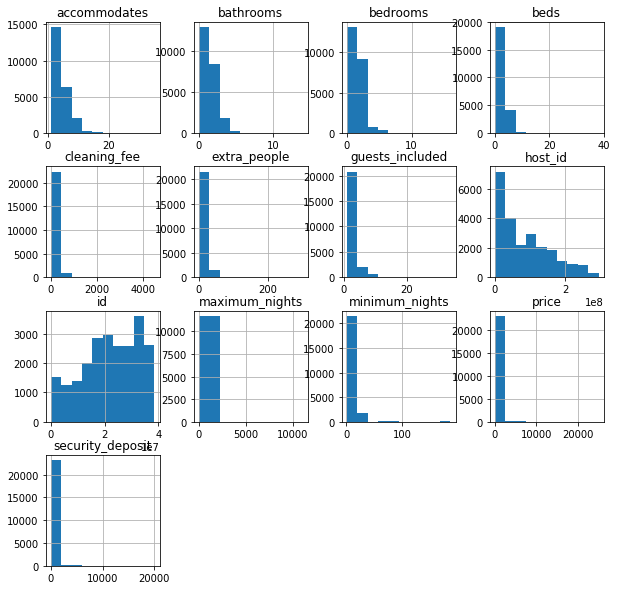

In [183]:
#Checking if Numerical Values are accurate
Futuristic_Airbnb_Listings_Property_df.hist(figsize=(10,10))

In [184]:
# Coverting boolean related columns to boolean values as mysql
Futuristic_Airbnb_Listings_Property_df["instant_bookable"].replace(["t","f"],[True,False],inplace=True)
Futuristic_Airbnb_Listings_Property_df["requires_license"].replace(["t","f"],[True,False],inplace=True)
Futuristic_Airbnb_Listings_Property_df["is_business_travel_ready"].replace(["t","f"],[True,False],inplace=True)
Futuristic_Airbnb_Listings_Property_df["require_guest_profile_picture"].replace(["t","f"],[True,False],inplace=True)
Futuristic_Airbnb_Listings_Property_df["require_guest_phone_verification"].replace(["t","f"],[True,False],inplace=True)

In [185]:
#Renaming id to Listing_id
Futuristic_Airbnb_Listings_Property_df=Futuristic_Airbnb_Listings_Property_df.rename(columns={"id":"listing_id"})

In [186]:
# Dropping the duplicates in Futuristic_Airbnb_Hosts_df data frame

Futuristic_Airbnb_Listings_Property_df = Futuristic_Airbnb_Listings_Property_df.drop_duplicates(keep="first")

Futuristic_Airbnb_Listings_Property_df = Futuristic_Airbnb_Listings_Property_df.reset_index(drop=True)

In [187]:
Futuristic_Airbnb_Listings_Property_df.head()

,listing_id,host_id,listing_url,name,summary,description,transit,access,house_rules,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
0,3002,3364,https://www.airbnb.com/rooms/3002,"OCEAN VIEW 1BLK2BEACH,LANAI A/C,FULL KITCH,CEN...",women or couples only. No men alone. Will Dedu...,women or couples only. No men alone. Will Dedu...,Bus right out front goes everywhere.,"Pool on 4th floor, laundry in basement.",Only house rules: No shoes on carpet ( ok if y...,Condominium,Private room,2,1.0,1.0,1.0,Futon,"TV,Cable TV,Internet,Air conditioning,Pool,Kit...",69.0,0.0,45.0,1,10.0,1,3,True,False,False,strict,False,False
1,5065,7257,https://www.airbnb.com/rooms/5065,MAUKA BB,"Perfect for your vacation, Staycation or just ...","Perfect for your vacation, Staycation or just ...",There is a bus stop located in Honoka'a town ...,A BBQ grill is available,No smoking indoors and No pets allowed.,Bed and breakfast,Entire home/apt,2,1.0,0.0,1.0,Real Bed,"Cable TV,Internet,Wifi,Free parking on premise...",85.0,0.0,0.0,2,50.0,2,700,True,False,False,moderate,False,False
2,5269,7620,https://www.airbnb.com/rooms/5269,Upcountry Hospitality in the 'Auwai Suite,"The 'Auwai Suite is a lovely, self-contained a...","The 'Auwai Suite is a lovely, self-contained a...",One parking spot is provided with your stay.,You'll have access to your private garden suit...,Information Not Available,Apartment,Entire home/apt,2,1.0,1.0,0.0,Real Bed,"TV,Cable TV,Wifi,Kitchen,Free parking on premi...",97.0,0.0,50.0,2,10.0,2,186,True,True,False,strict,False,False
3,5387,7878,https://www.airbnb.com/rooms/5387,Hale Koa Studio & 1 Bedroom Units!!,This Wonderful Spacious Studio apt/flat is in ...,This Wonderful Spacious Studio apt/flat is in ...,"Close to Major highway (belt road) accessable,...","entire apartment, with full kitchen, baths an...",* Absolutely NO Smoking inside the house. * R...,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"TV,Cable TV,Internet,Wifi,Kitchen,Free parking...",92.0,0.0,75.0,2,15.0,5,60,True,True,False,strict,False,False
4,5389,7878,https://www.airbnb.com/rooms/5389,Keauhou Villa,It is less than 10 minute walk to the Keauhou ...,It is less than 10 minute walk to the Keauhou ...,It is less than 10 minute walk to the Keauhou ...,"Entire House with Garage, Screened Lanai, Fron...","as at your own home, in a residential area",House,Entire home/apt,6,3.0,3.0,4.0,Real Bed,"TV,Cable TV,Internet,Wifi,Air conditioning,Poo...",299.0,300.0,245.0,2,30.0,6,180,True,False,False,flexible,False,False


In [188]:
len(Futuristic_Airbnb_Listings_Property_df)

23452

<hr>

### <ins>Futuristic_Airbnb_Property_Address_df </ins> <hr>

### <ins>Creating New data frame for Property Address Columns</ins>

In [189]:
Futuristic_Airbnb_Property_Address_df = Listings_df[['id','street','neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact']].copy()

In [190]:
Futuristic_Airbnb_Property_Address_df.head()

,id,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact
0,3002,"Honolulu, HI, United States",Oʻahu,Primary Urban Center,Honolulu,Honolulu,HI,96815,Oahu,"Honolulu, HI",US,United States,21.27603,-157.82210,t
1,5065,"Honokaa, HI, United States",Hamakua Coast,Hamakua,Hawaii,Honokaa,HI,96727,The Big Island,"Honokaa, HI",US,United States,20.04095,-155.43251,t
2,5269,"Kamuela, HI, United States",Island of Hawaiʻi,South Kohala,Hawaii,Kamuela,HI,96743,The Big Island,"Kamuela, HI",US,United States,20.02621,-155.70145,f
3,5387,"Captain Cook, HI, United States",Island of Hawaiʻi,South Kona,Hawaii,Captain Cook,HI,96704,The Big Island,"Captain Cook, HI",US,United States,19.43119,-155.88079,t
4,5389,"Kailua Kona, HI, United States",Kailua/Kona,North Kona,Hawaii,Kailua Kona,HI,96740,The Big Island,"Kailua Kona, HI",US,United States,19.56413,-155.96347,t


In [191]:
len(Futuristic_Airbnb_Property_Address_df)

23452

### <ins> Cleaning the Data Frame </ins>

In [192]:
#Determining the Null Value Data
round(( Futuristic_Airbnb_Property_Address_df.isna().sum()/len(Futuristic_Airbnb_Property_Address_df) ) * 100).sort_values(ascending=False)

zipcode                         1.0
is_location_exact               0.0
longitude                       0.0
latitude                        0.0
country                         0.0
country_code                    0.0
smart_location                  0.0
market                          0.0
state                           0.0
city                            0.0
neighbourhood_group_cleansed    0.0
neighbourhood_cleansed          0.0
neighbourhood                   0.0
street                          0.0
id                              0.0
dtype: float64

In [193]:
# Dropping the duplicates in Futuristic_Airbnb_Property_Address_df data frame

Futuristic_Airbnb_Property_Address_df = Futuristic_Airbnb_Property_Address_df.drop_duplicates(keep="first")

Futuristic_Airbnb_Property_Address_df = Futuristic_Airbnb_Property_Address_df.reset_index(drop=True)

In [194]:
Futuristic_Airbnb_Property_Address_df.head()

,id,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact
0,3002,"Honolulu, HI, United States",Oʻahu,Primary Urban Center,Honolulu,Honolulu,HI,96815,Oahu,"Honolulu, HI",US,United States,21.27603,-157.82210,t
1,5065,"Honokaa, HI, United States",Hamakua Coast,Hamakua,Hawaii,Honokaa,HI,96727,The Big Island,"Honokaa, HI",US,United States,20.04095,-155.43251,t
2,5269,"Kamuela, HI, United States",Island of Hawaiʻi,South Kohala,Hawaii,Kamuela,HI,96743,The Big Island,"Kamuela, HI",US,United States,20.02621,-155.70145,f
3,5387,"Captain Cook, HI, United States",Island of Hawaiʻi,South Kona,Hawaii,Captain Cook,HI,96704,The Big Island,"Captain Cook, HI",US,United States,19.43119,-155.88079,t
4,5389,"Kailua Kona, HI, United States",Kailua/Kona,North Kona,Hawaii,Kailua Kona,HI,96740,The Big Island,"Kailua Kona, HI",US,United States,19.56413,-155.96347,t


In [195]:
Futuristic_Airbnb_Property_Address_df['street'].value_counts()

Honolulu, HI, United States                          4618
Kihei, HI, United States                             2941
Lahaina, HI, United States                           2850
Kailua-Kona, HI, United States                       1428
Princeville, HI, United States                       1132
Koloa, HI, United States                              811
Kapaa, HI, United States                              513
Kailua, HI, United States                             492
Kailua Kona, HI, United States                        447
Pāhoa, HI, United States                              419
Hilo, HI, United States                               397
Kapolei, HI, United States                            322
Captain Cook, HI, United States                       295
Wailuku, HI, United States                            294
Keaau, HI, United States                              286
Waimea, HI, United States                             284
Haleiwa, HI, United States                            279
Waikoloa Villa

In [196]:
#All 'Street' column values include "Hi, United States".Let's remove this part.
street_short=[]  
Futuristic_Airbnb_Property_Address_df['street'][0]
for i in Futuristic_Airbnb_Property_Address_df['street']:
    one=i.split(',')
    street_short.append(one[0])
Futuristic_Airbnb_Property_Address_df['street']=street_short

In [197]:
Futuristic_Airbnb_Property_Address_df['smart_location'].value_counts()

Honolulu, HI                          4618
Kihei, HI                             2941
Lahaina, HI                           2850
Kailua-Kona, HI                       1428
Princeville, HI                       1132
Koloa, HI                              811
Kapaa, HI                              513
Kailua, HI                             492
Kailua Kona, HI                        447
Pāhoa, HI                              419
Hilo, HI                               397
Kapolei, HI                            322
Captain Cook, HI                       295
Wailuku, HI                            294
Keaau, HI                              286
Waimea, HI                             284
Haleiwa, HI                            279
Waikoloa Village, HI                   276
Volcano, HI                            249
KIHEI, HI                              232
Waianae, HI                            223
Kamuela, HI                            207
Wailea, HI                             199
Waikoloa, H

In [198]:
#Let's cut the HI(it is the same)
street_short=[]  
Futuristic_Airbnb_Property_Address_df['smart_location'][0]
for i in Futuristic_Airbnb_Property_Address_df['smart_location']:
    one=i.split(',')
    street_short.append(one[0])
Futuristic_Airbnb_Property_Address_df['smart_location']=street_short

In [199]:
Futuristic_Airbnb_Property_Address_df['state'].value_counts()

HI    23413
Hi       20
US        1
FL        1
Name: state, dtype: int64

In [200]:
#There is a mistake:
Futuristic_Airbnb_Property_Address_df.loc[Futuristic_Airbnb_Property_Address_df['state']=='FL',:]

,id,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact
13395,24939060,Pensacola Beach,Maui,Kihei-Makena,Maui,Pensacola Beach,FL,32561,Maui,Pensacola Beach,US,United States,20.67392,-156.44209,f


In [201]:
#Let's substitude Hi FL US on "Hawaii"
Futuristic_Airbnb_Property_Address_df['state']=Futuristic_Airbnb_Property_Address_df['state'].\
                                                replace({'Hi':'Hawaii','HI':'Hawaii','US':'Hawaii','FL':'Hawaii'})
Futuristic_Airbnb_Property_Address_df['state'].value_counts()

Hawaii    23435
Name: state, dtype: int64

In [202]:
Futuristic_Airbnb_Property_Address_df['country_code'].value_counts()

US    23452
Name: country_code, dtype: int64

In [203]:
Futuristic_Airbnb_Property_Address_df['country'].value_counts()

United States    23452
Name: country, dtype: int64

In [204]:
# Coverting boolean related columns to boolean values as mysql
Futuristic_Airbnb_Property_Address_df["is_location_exact"].replace(["t","f"],[True,False],inplace=True)

In [205]:
Futuristic_Airbnb_Property_Address_df=Futuristic_Airbnb_Property_Address_df.rename(columns={"id":"listing_id"})

In [206]:
Futuristic_Airbnb_Property_Address_df.head()

,listing_id,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact
0,3002,Honolulu,Oʻahu,Primary Urban Center,Honolulu,Honolulu,Hawaii,96815,Oahu,Honolulu,US,United States,21.27603,-157.82210,True
1,5065,Honokaa,Hamakua Coast,Hamakua,Hawaii,Honokaa,Hawaii,96727,The Big Island,Honokaa,US,United States,20.04095,-155.43251,True
2,5269,Kamuela,Island of Hawaiʻi,South Kohala,Hawaii,Kamuela,Hawaii,96743,The Big Island,Kamuela,US,United States,20.02621,-155.70145,False
3,5387,Captain Cook,Island of Hawaiʻi,South Kona,Hawaii,Captain Cook,Hawaii,96704,The Big Island,Captain Cook,US,United States,19.43119,-155.88079,True
4,5389,Kailua Kona,Kailua/Kona,North Kona,Hawaii,Kailua Kona,Hawaii,96740,The Big Island,Kailua Kona,US,United States,19.56413,-155.96347,True


In [207]:
len(Futuristic_Airbnb_Property_Address_df)

23452

### <ins>Futuristic_Airbnb_Property_Availability_df </ins> <hr>

### <ins> Creating New data frame for Property Availability Columns </ins>

In [208]:
Futuristic_Airbnb_Property_Availability_df = Listings_df[["id","has_availability","availability_30","availability_60",
                                                          "availability_90","availability_365"]].copy()
Futuristic_Airbnb_Property_Availability_df.head()

,id,has_availability,availability_30,availability_60,availability_90,availability_365
0,3002,t,3,13,35,35
1,5065,t,30,60,90,363
2,5269,t,30,38,63,333
3,5387,t,11,25,46,286
4,5389,t,12,29,48,256


In [209]:
len(Futuristic_Airbnb_Property_Availability_df)

23452

### <ins> Cleaning the Data Frame </ins>

In [210]:
#Checking if any Null Value Data in Property Availability Related Columns
round(( Futuristic_Airbnb_Property_Availability_df.isna().sum()/len(Futuristic_Airbnb_Property_Availability_df) ) * 100).sort_values(ascending=False)

availability_365    0.0
availability_90     0.0
availability_60     0.0
availability_30     0.0
has_availability    0.0
id                  0.0
dtype: float64

In [211]:
# Coverting boolean related columns to boolean values as mysql
Futuristic_Airbnb_Property_Availability_df["has_availability"].replace(["t","f"],[True,False],inplace=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027890F33D30>,
      dtype=object)

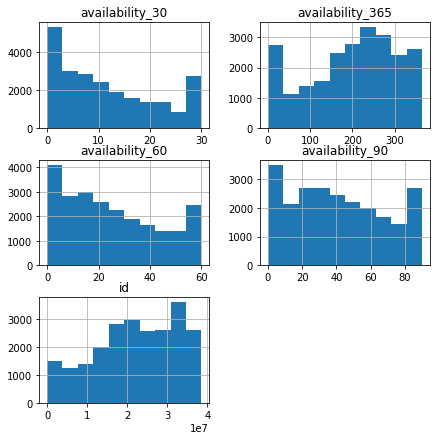

In [212]:
#Checking if Numerical Values are accurate
Futuristic_Airbnb_Property_Availability_df.hist(figsize=(7,7))

In [213]:
# Dropping the duplicates in Futuristic_Airbnb_Property_Availability_df data frame

Futuristic_Airbnb_Property_Availability_df = Futuristic_Airbnb_Property_Availability_df.drop_duplicates(keep="first")

Futuristic_Airbnb_Property_Availability_df = Futuristic_Airbnb_Property_Availability_df.reset_index(drop=True)

In [214]:
Futuristic_Airbnb_Property_Availability_df.head()

,id,has_availability,availability_30,availability_60,availability_90,availability_365
0,3002,True,3,13,35,35
1,5065,True,30,60,90,363
2,5269,True,30,38,63,333
3,5387,True,11,25,46,286
4,5389,True,12,29,48,256


In [215]:
#Checking the Number of Rows in Futuristic_Airbnb_Hosts_df
len(Futuristic_Airbnb_Property_Availability_df)

23452

### <ins>Futuristic_Airbnb_Property_Reviews_df </ins> <hr>

### <ins> Store Reviews CSV into DataFrame </ins>

In [68]:
Reviews_df =  pd.read_csv("../Dataset-ETL/Hawaii/reviews.csv", encoding="utf8")
Reviews_df = Reviews_df.rename(columns={'id':'review_id','date':'review_date'})
Reviews_df.head()

,listing_id,review_id,review_date,reviewer_id,reviewer_name,comments
0,3002,63686,2010-07-11,155310,Debbie,"Lynne is very kind and accommodating, the loca..."
1,3002,71254,2010-07-31,75939,Bonnie,I came back to the island on my own for my 25t...
2,3002,132520,2010-11-02,189930,Alexandra,I had a wonderfull time in Hawaii. Lynne is a ...
3,3002,158315,2010-12-25,291487,Shirley,"Lynn was a wonderful hostess and is a lovely, ..."
4,3002,168133,2011-01-08,331679,Elizabeth,"Just a short walk to Waikiki beach, restaurant..."


### <ins> Copying the Reviews Related Columns from Listings_df</ins>

In [216]:
Listings_Reviews_df = Listings_df[["id","number_of_reviews","number_of_reviews_ltm","first_review","last_review","review_scores_rating","review_scores_accuracy",
                                  "review_scores_cleanliness","review_scores_checkin","review_scores_communication","review_scores_location","review_scores_value",
                                  "reviews_per_month"]].copy()
Listings_Reviews_df = Listings_Reviews_df.rename(columns={'id':'listing_id'})
Listings_Reviews_df.head()

,listing_id,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
0,3002,234,20,2010-07-11,2019-08-28,95.0,10.0,9.0,10.0,10.0,10.0,9.0,2.09
1,5065,37,3,2013-02-18,2019-08-19,91.0,9.0,9.0,10.0,9.0,9.0,9.0,0.46
2,5269,5,3,2011-05-31,2019-09-04,75.0,10.0,7.0,10.0,10.0,10.0,10.0,0.05
3,5387,159,16,2010-02-16,2019-07-15,92.0,9.0,9.0,10.0,10.0,10.0,9.0,1.36
4,5389,15,4,2013-11-16,2019-08-17,100.0,10.0,10.0,10.0,10.0,10.0,10.0,0.21


### <ins> Merging Reviews_df & Listing_Reviews_df </ins>

In [217]:
Futuristic_Airbnb_Property_Reviews_df = pd.merge(Listings_Reviews_df, Reviews_df, on='listing_id',how ='inner')
Futuristic_Airbnb_Property_Reviews_df.head()

,listing_id,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,review_id,review_date,reviewer_id,reviewer_name,comments
0,3002,234,20,2010-07-11,2019-08-28,95.0,10.0,9.0,10.0,10.0,10.0,9.0,2.09,63686,2010-07-11,155310,Debbie,"Lynne is very kind and accommodating, the loca..."
1,3002,234,20,2010-07-11,2019-08-28,95.0,10.0,9.0,10.0,10.0,10.0,9.0,2.09,71254,2010-07-31,75939,Bonnie,I came back to the island on my own for my 25t...
2,3002,234,20,2010-07-11,2019-08-28,95.0,10.0,9.0,10.0,10.0,10.0,9.0,2.09,132520,2010-11-02,189930,Alexandra,I had a wonderfull time in Hawaii. Lynne is a ...
3,3002,234,20,2010-07-11,2019-08-28,95.0,10.0,9.0,10.0,10.0,10.0,9.0,2.09,158315,2010-12-25,291487,Shirley,"Lynn was a wonderful hostess and is a lovely, ..."
4,3002,234,20,2010-07-11,2019-08-28,95.0,10.0,9.0,10.0,10.0,10.0,9.0,2.09,168133,2011-01-08,331679,Elizabeth,"Just a short walk to Waikiki beach, restaurant..."


In [218]:
len(Futuristic_Airbnb_Property_Reviews_df)

576930

### Cleaning the Data Frame

In [219]:
#Determining the Null Value Data from the Calendar dataset
round(( Futuristic_Airbnb_Property_Reviews_df.isna().sum()/len(Futuristic_Airbnb_Property_Reviews_df) ) * 100).sort_values(ascending=False)

comments                       0.0
reviewer_name                  0.0
number_of_reviews              0.0
number_of_reviews_ltm          0.0
first_review                   0.0
last_review                    0.0
review_scores_rating           0.0
review_scores_accuracy         0.0
review_scores_cleanliness      0.0
review_scores_checkin          0.0
review_scores_communication    0.0
review_scores_location         0.0
review_scores_value            0.0
reviews_per_month              0.0
review_id                      0.0
review_date                    0.0
reviewer_id                    0.0
listing_id                     0.0
dtype: float64

In [220]:
# Converting first_review , last_review & review_date to datetime
Futuristic_Airbnb_Property_Reviews_df['first_review'] = pd.to_datetime(Futuristic_Airbnb_Property_Reviews_df['first_review'])
Futuristic_Airbnb_Property_Reviews_df['last_review'] = pd.to_datetime(Futuristic_Airbnb_Property_Reviews_df['last_review'])
Futuristic_Airbnb_Property_Reviews_df['review_date'] = pd.to_datetime(Futuristic_Airbnb_Property_Reviews_df['review_date'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000278911152B0>,
      dtype=object)

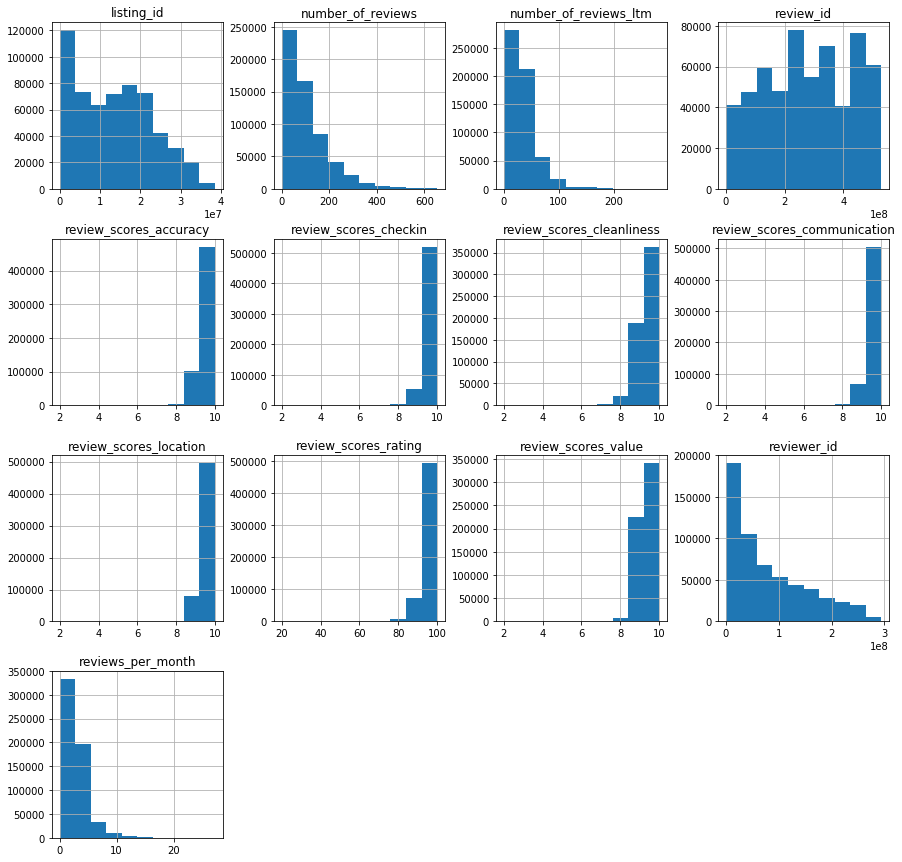

In [221]:
#Checking if Numerical Values are accurate
Futuristic_Airbnb_Property_Reviews_df.hist(figsize=(15,15))

In [222]:
#Cleaning Reviwer_name & comments column
Futuristic_Airbnb_Property_Reviews_df['reviewer_name']=[re.sub('[^a-zA-Z]+', ' ' ,item) for item in Futuristic_Airbnb_Property_Reviews_df['reviewer_name']]
Futuristic_Airbnb_Property_Reviews_df['comments'] = [re.sub('[^a-zA-Z]+',' ',str(i)) for i in Futuristic_Airbnb_Property_Reviews_df['comments']]


In [223]:
#Dropping duplicates
Futuristic_Airbnb_Property_Reviews_df= Futuristic_Airbnb_Property_Reviews_df.drop_duplicates()
Futuristic_Airbnb_Property_Reviews_df = Futuristic_Airbnb_Property_Reviews_df.reset_index(drop=True)
Futuristic_Airbnb_Property_Reviews_df.head()

,listing_id,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,review_id,review_date,reviewer_id,reviewer_name,comments
0,3002,234,20,2010-07-11,2019-08-28,95.0,10.0,9.0,10.0,10.0,10.0,9.0,2.09,63686,2010-07-11,155310,Debbie,Lynne is very kind and accommodating the locat...
1,3002,234,20,2010-07-11,2019-08-28,95.0,10.0,9.0,10.0,10.0,10.0,9.0,2.09,71254,2010-07-31,75939,Bonnie,I came back to the island on my own for my th ...
2,3002,234,20,2010-07-11,2019-08-28,95.0,10.0,9.0,10.0,10.0,10.0,9.0,2.09,132520,2010-11-02,189930,Alexandra,I had a wonderfull time in Hawaii Lynne is a s...
3,3002,234,20,2010-07-11,2019-08-28,95.0,10.0,9.0,10.0,10.0,10.0,9.0,2.09,158315,2010-12-25,291487,Shirley,Lynn was a wonderful hostess and is a lovely f...
4,3002,234,20,2010-07-11,2019-08-28,95.0,10.0,9.0,10.0,10.0,10.0,9.0,2.09,168133,2011-01-08,331679,Elizabeth,Just a short walk to Waikiki beach restaurants...


In [224]:
len(Futuristic_Airbnb_Property_Reviews_df)

576930

### <ins>Futuristic_Airbnb_Calendar_df </ins> <hr>

### <ins>Store calendar CSV into DataFrame</ins>

In [78]:
Original_calendar_df = pd.read_csv("../Dataset-ETL/Hawaii/calendar.csv", encoding="utf8")

Original_calendar_df.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,66800,2019-09-12,f,$150.00,$150.00,3,180
1,216892,2019-09-12,t,$115.00,$115.00,2,7
2,216892,2019-09-13,t,$115.00,$115.00,2,7
3,216892,2019-09-14,t,$115.00,$115.00,2,7
4,216892,2019-09-15,t,$115.00,$115.00,2,7


In [79]:
len(Original_calendar_df)

8559980

### Creating New Calendar data frame

<hr>

In [225]:
Futuristic_Airbnb_calendar_df=Original_calendar_df[['listing_id','date','available','price','adjusted_price',
                                                    'minimum_nights','maximum_nights']].copy()
Futuristic_Airbnb_calendar_df.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,66800,2019-09-12,f,$150.00,$150.00,3,180
1,216892,2019-09-12,t,$115.00,$115.00,2,7
2,216892,2019-09-13,t,$115.00,$115.00,2,7
3,216892,2019-09-14,t,$115.00,$115.00,2,7
4,216892,2019-09-15,t,$115.00,$115.00,2,7


### Cleaning the Data Frame

In [226]:
#Determining the Null Value Data from the Calendar dataset
round(( Futuristic_Airbnb_calendar_df.isna().sum()/len(Futuristic_Airbnb_calendar_df) ) * 100).sort_values(ascending=False)

maximum_nights    0.0
minimum_nights    0.0
adjusted_price    0.0
price             0.0
available         0.0
date              0.0
listing_id        0.0
dtype: float64

In [227]:
#Price Column Data cleanup
Futuristic_Airbnb_calendar_df["price"] = pd.to_numeric( Futuristic_Airbnb_calendar_df["price"].replace({'\$': '', ',': ''}, regex=True))
Futuristic_Airbnb_calendar_df["adjusted_price"] = pd.to_numeric( Futuristic_Airbnb_calendar_df["adjusted_price"].replace({'\$': '', ',': ''}, regex=True))

In [228]:
#Data Cleanup for date Column : Converting to DateTime Column

Futuristic_Airbnb_calendar_df.date = pd.to_datetime(Futuristic_Airbnb_calendar_df.date)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002789BE9ACC0>,
      dtype=object)

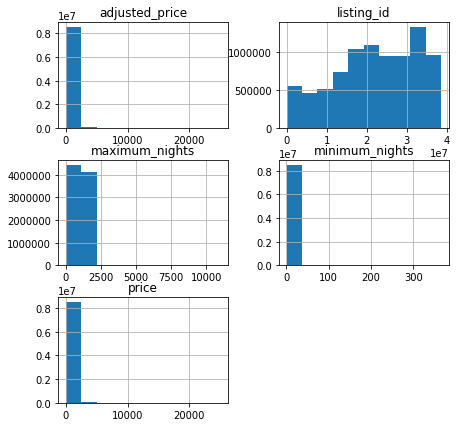

In [229]:
#Checking if Numerical Values are accurate
Futuristic_Airbnb_calendar_df.hist(figsize=(7,7))

In [230]:
# Coverting boolean related columns to boolean values as mysql
Futuristic_Airbnb_calendar_df["available"].replace(["t","f"],[True,False],inplace=True)

In [231]:
# Dropping the duplicates in Futuristic_Airbnb_calendar_df data frame

Futuristic_Airbnb_calendar_df = Futuristic_Airbnb_calendar_df.drop_duplicates(keep="first")

Futuristic_Airbnb_calendar_df = Futuristic_Airbnb_calendar_df.reset_index(drop=True)
Futuristic_Airbnb_calendar_df.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,66800,2019-09-12,False,150.0,150.0,3,180
1,216892,2019-09-12,True,115.0,115.0,2,7
2,216892,2019-09-13,True,115.0,115.0,2,7
3,216892,2019-09-14,True,115.0,115.0,2,7
4,216892,2019-09-15,True,115.0,115.0,2,7


In [232]:
len(Futuristic_Airbnb_calendar_df) 

8559980

<hr><hr>

### <ins> Hawaii Restuarant Bar Cafe - API Call </ins>
<hr>

In [233]:
gkey = "******************************"
# Access maps with unique API key
gmaps.configure(api_key=gkey)

In [234]:
api_key='******************************************************'
headers = {'Authorization': 'Bearer %s' % api_key}
url='https://api.yelp.com/v3/businesses/search'

In [235]:
city_l=['Honolulu','Kihei','Lahaina','Kailua-Kona','Princeville','Koloa','Kapaa','Kailua','Pāhoa','Hilo','Kapolei','Captain Cook, HI','Wailuku','Keaau','Waimea','Haleiwa','Waikoloa','Volcano','Waianae','Kamuela','Wailea']
city_list=[]
name_list=[]
rating=[]
lat=[]
lng=[]
category=[]
address=[]
zipcode=[]
for i in city_l:
    params= {'term':'cafe','location':i}
    data=requests.get(url, params=params, headers=headers).json()
    for i in range(0,len(data['businesses'])):
        city_list.append(data['businesses'][i]['location']['city'])
        name_list.append(data['businesses'][i]['name'])
        rating.append(data['businesses'][i]['rating'])
        t=str()
        j=0
        for j in data['businesses'][i]['categories']:
            t=t+str(j['title']+" ")
        category.append(t)
        t=0
        address.append(data['businesses'][i]['location']['address1'])
        zipcode.append(data['businesses'][i]['location']['zip_code'])
        lat.append(data['businesses'][i]['coordinates']['latitude'])
        lng.append(data['businesses'][i]['coordinates']['longitude'])

In [236]:
for i in city_l:
    params= {'term':'bar','location':i}
    data=requests.get(url, params=params, headers=headers).json()
    for i in range(0,len(data['businesses'])):
        city_list.append(data['businesses'][i]['location']['city'])
        name_list.append(data['businesses'][i]['name'])
        rating.append(data['businesses'][i]['rating'])
        t=str()
        j=0
        for j in data['businesses'][i]['categories']:
            t=t+str(j['title']+" ")
        category.append(t)
        t=0
        address.append(data['businesses'][i]['location']['address1'])
        zipcode.append(data['businesses'][i]['location']['zip_code'])
        lat.append(data['businesses'][i]['coordinates']['latitude'])
        lng.append(data['businesses'][i]['coordinates']['longitude'])

In [237]:
for i in city_l:
    params = {'term':'restaurant','location':i}
    data=requests.get(url, params=params, headers=headers).json()
    for i in range(0,len(data['businesses'])):
        city_list.append(data['businesses'][i]['location']['city'])
        name_list.append(data['businesses'][i]['name'])
        rating.append(data['businesses'][i]['rating'])
        t=str()
        j=0
        for j in data['businesses'][i]['categories']:
            t=t+str(j['title']+" ")
        category.append(t)
        t=0
        address.append(data['businesses'][i]['location']['address1'])
        zipcode.append(data['businesses'][i]['location']['zip_code'])
        lat.append(data['businesses'][i]['coordinates']['latitude'])
        lng.append(data['businesses'][i]['coordinates']['longitude'])

In [238]:
Rest_Bar_Cafe_df=pd.DataFrame({"city":city_list,"name":name_list,"rating":rating,'address':address,'zipcode':zipcode,"latitude":lat,"longitude":lng,'category':category})    
Rest_Bar_Cafe_df

,city,name,rating,address,zipcode,latitude,longitude,category
0,Honolulu,Brew & Foam,4.5,1909 Ala Wai Blvd,96815,21.287290,-157.832950,Coffee & Tea Internet Cafes Juice Bars & Smoot...
1,Honolulu,Raintree Bakery Coffeehouse,4.5,1110 Pensacola St,96814,21.301830,-157.845350,Bakeries Cafes Sandwiches
2,Honolulu,Ali'i Coffee,5.0,35 S Beretania St,96813,21.311500,-157.859860,Coffee & Tea Coffee Roasteries Sandwiches
3,Honolulu,Island Vintage Coffee,4.5,2301 Kalakaua Ave,96815,21.278318,-157.828249,Coffee & Tea
4,Honolulu,Kai Coffee Hawai'i,4.5,2424 Kalakaua Ave,96815,21.276164,-157.825223,Coffee & Tea
5,Honolulu,Arvo Café,4.0,342 Coral St,96813,21.300593,-157.859111,Cafes
6,Honolulu,The Sunrise Shack,4.5,2335 Kalakaua Ave,96815,21.277184,-157.827591,Coffee & Tea Juice Bars & Smoothies
7,Honolulu,Kona Coffee Purveyors - b.Patisserie,4.5,2330 Kalakaua Ave,96815,21.278811,-157.825710,Coffee & Tea Bakeries Cafes
8,Honolulu,All Islands Fresh Roast,5.0,333 Ward Ave,96814,21.296220,-157.855170,Coffee & Tea
9,Honolulu,Waioli Kitchen & Bake Shop,4.5,2950 Manoa Rd,96822,21.316129,-157.812244,Breakfast & Brunch Bakeries Cafes


In [239]:
coord = Rest_Bar_Cafe_df[['latitude', 'longitude']]


fig = gmaps.figure()
markers=gmaps.marker_layer(coord)
fig.add_layer(markers)
fig

Figure(layout=FigureLayout(height='420px'))

In [240]:
#Merging with Address df to get the respective listing_id
Address_Rest_Bar_Cafe_df = pd.merge(Rest_Bar_Cafe_df, Futuristic_Airbnb_Property_Address_df, on=['city','zipcode'],how='inner')
Address_Rest_Bar_Cafe_df.head()
#len(Address_Rest_Bar_Cafe_df)

,city,name,rating,address,zipcode,latitude_x,longitude_x,category,listing_id,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,state,market,smart_location,country_code,country,latitude_y,longitude_y,is_location_exact
0,Honolulu,Brew & Foam,4.5,1909 Ala Wai Blvd,96815,21.28729,-157.83295,Coffee & Tea Internet Cafes Juice Bars & Smoot...,3002,Honolulu,Oʻahu,Primary Urban Center,Honolulu,Hawaii,Oahu,Honolulu,US,United States,21.27603,-157.82210,True
1,Honolulu,Brew & Foam,4.5,1909 Ala Wai Blvd,96815,21.28729,-157.83295,Coffee & Tea Internet Cafes Juice Bars & Smoot...,18465,Honolulu,Oʻahu,Primary Urban Center,Honolulu,Hawaii,Oahu,Honolulu,US,United States,21.27508,-157.82213,True
2,Honolulu,Brew & Foam,4.5,1909 Ala Wai Blvd,96815,21.28729,-157.83295,Coffee & Tea Internet Cafes Juice Bars & Smoot...,18466,Honolulu,Oʻahu,Primary Urban Center,Honolulu,Hawaii,Oahu,Honolulu,US,United States,21.27370,-157.82170,True
3,Honolulu,Brew & Foam,4.5,1909 Ala Wai Blvd,96815,21.28729,-157.83295,Coffee & Tea Internet Cafes Juice Bars & Smoot...,20562,Honolulu,Waikiki,Primary Urban Center,Honolulu,Hawaii,Oahu,Honolulu,US,United States,21.27977,-157.82627,True
4,Honolulu,Brew & Foam,4.5,1909 Ala Wai Blvd,96815,21.28729,-157.83295,Coffee & Tea Internet Cafes Juice Bars & Smoot...,37099,Honolulu,Honolulu,Primary Urban Center,Honolulu,Hawaii,Oahu,Honolulu,US,United States,21.26977,-157.82282,True


In [241]:
Hawaii_Rest_Bar_Cafe_df = Address_Rest_Bar_Cafe_df[['listing_id','city','name','rating','address',
                                                    'zipcode','latitude_x','longitude_x','category']].copy()
Hawaii_Rest_Bar_Cafe_df = Hawaii_Rest_Bar_Cafe_df.rename(columns={"latitude_x":"latitude","longitude_x":"longitude"})
Hawaii_Rest_Bar_Cafe_df.head()

,listing_id,city,name,rating,address,zipcode,latitude,longitude,category
0,3002,Honolulu,Brew & Foam,4.5,1909 Ala Wai Blvd,96815,21.28729,-157.83295,Coffee & Tea Internet Cafes Juice Bars & Smoot...
1,18465,Honolulu,Brew & Foam,4.5,1909 Ala Wai Blvd,96815,21.28729,-157.83295,Coffee & Tea Internet Cafes Juice Bars & Smoot...
2,18466,Honolulu,Brew & Foam,4.5,1909 Ala Wai Blvd,96815,21.28729,-157.83295,Coffee & Tea Internet Cafes Juice Bars & Smoot...
3,20562,Honolulu,Brew & Foam,4.5,1909 Ala Wai Blvd,96815,21.28729,-157.83295,Coffee & Tea Internet Cafes Juice Bars & Smoot...
4,37099,Honolulu,Brew & Foam,4.5,1909 Ala Wai Blvd,96815,21.28729,-157.83295,Coffee & Tea Internet Cafes Juice Bars & Smoot...


In [242]:
# Dropping the duplicates in Futuristic_Airbnb_calendar_df data frame
Hawaii_Rest_Bar_Cafe_df = Hawaii_Rest_Bar_Cafe_df.drop_duplicates(keep="first")
Hawaii_Rest_Bar_Cafe_df = Hawaii_Rest_Bar_Cafe_df.reset_index(drop=True)
Hawaii_Rest_Bar_Cafe_df.head()

,listing_id,city,name,rating,address,zipcode,latitude,longitude,category
0,3002,Honolulu,Brew & Foam,4.5,1909 Ala Wai Blvd,96815,21.28729,-157.83295,Coffee & Tea Internet Cafes Juice Bars & Smoot...
1,18465,Honolulu,Brew & Foam,4.5,1909 Ala Wai Blvd,96815,21.28729,-157.83295,Coffee & Tea Internet Cafes Juice Bars & Smoot...
2,18466,Honolulu,Brew & Foam,4.5,1909 Ala Wai Blvd,96815,21.28729,-157.83295,Coffee & Tea Internet Cafes Juice Bars & Smoot...
3,20562,Honolulu,Brew & Foam,4.5,1909 Ala Wai Blvd,96815,21.28729,-157.83295,Coffee & Tea Internet Cafes Juice Bars & Smoot...
4,37099,Honolulu,Brew & Foam,4.5,1909 Ala Wai Blvd,96815,21.28729,-157.83295,Coffee & Tea Internet Cafes Juice Bars & Smoot...


In [243]:
len(Hawaii_Rest_Bar_Cafe_df)

641735

<hr><hr>

## <ins> Load Process </ins>
<hr>

### <ins>Connecting to local database</ins>

In [244]:
rds_connection_string = "root:Krish_2012@127.0.0.1/Futuristic_Airbnb_db"
engine = create_engine(f"mysql+pymysql://{rds_connection_string}?charset=utf8", encoding = "utf8")

### <ins>Checking for the tables</ins>

In [245]:
engine.table_names()

['futuristic_airbnb_calendar',
 'futuristic_airbnb_hawaii_rcb',
 'futuristic_airbnb_hosts',
 'futuristic_airbnb_listings_property',
 'futuristic_airbnb_property_address',
 'futuristic_airbnb_property_availability',
 'futuristic_airbnb_property_reviews']

In [246]:
#For Faster Execution
from sqlalchemy import event

@event.listens_for(engine, 'before_cursor_execute')
def receive_before_cursor_execute(conn, cursor, statement, params, context, executemany):
    if executemany:
        cursor.fast_executemany = True

### <ins>Using pandas to load csv converted DataFrame into database ( Futuristic Airbnb Database)</ins>

#### Loading Data into Futuristic_Airbnb_Hosts table

In [247]:
Futuristic_Airbnb_Hosts_df.to_sql(name='futuristic_airbnb_hosts', con=engine, if_exists='append', \
                                 index=False,chunksize=5000)

#### Loading Data into Futuristic_Airbnb_Listings_Property table

In [248]:
Futuristic_Airbnb_Listings_Property_df.to_sql(name='futuristic_airbnb_listings_property', con=engine, \
                                              if_exists='append', index=False,chunksize=5000)

#### Loading Data into Futuristic_Airbnb_Property_Address table

In [249]:
Futuristic_Airbnb_Property_Address_df.to_sql(name='futuristic_airbnb_property_address', con=engine, \
                                             if_exists='append', index=False,chunksize=5000)

#### Loading Data into Futuristic_Airbnb_Property_Availability table

In [250]:
Futuristic_Airbnb_Property_Availability_df.to_sql(name='futuristic_airbnb_property_availability', con=engine,\
                                                  if_exists='append', index=False,chunksize=5000)

#### Loading Data into Futuristic_Airbnb_Property_Reviews table

In [251]:
Futuristic_Airbnb_Property_Reviews_df.to_sql(name='futuristic_airbnb_property_reviews', con=engine, \
                                             if_exists='append', index=False,chunksize=5000, method="multi")

#### Loading Data into Futuristic_Airbnb_Hawaii_RCB table

In [252]:
Hawaii_Rest_Bar_Cafe_df.to_sql(name='futuristic_airbnb_hawaii_rcb', con=engine, if_exists='append', \
                               index=False,chunksize=5000, method="multi")

#### Loading Data into Futuristic_Airbnb_Property_Calendar Table

In [253]:
Futuristic_Airbnb_calendar_df.to_sql(name='futuristic_airbnb_calendar', con=engine, if_exists='append', \
                                      index=False,chunksize=5000)

### <ins> Confirming whether data has been added by querying the futuristic_airbnb_hosts table </ins>


In [254]:
pd.read_sql_query('select "futuristic_airbnb_hosts" as Table_Name,count(*) from futuristic_airbnb_hosts\
                   union all\
                   select "futuristic_airbnb_listings_property" as Table_Name,count(*) from futuristic_airbnb_listings_property\
                   union all\
                   select "futuristic_airbnb_property_address" as Table_Name,count(*) from futuristic_airbnb_property_address\
                   union all\
                   select "futuristic_airbnb_property_availability" as Table_Name,count(*) from futuristic_airbnb_property_availability\
                   union all\
                   select "futuristic_airbnb_property_reviews" as Table_Name,count(*) from futuristic_airbnb_property_reviews\
                   union all\
                   select "futuristic_airbnb_calendar" as Table_Name,count(*) from futuristic_airbnb_calendar\
                   union all\
                   select "futuristic_airbnb_hawaii_rcb" as Table_Name,count(*) from futuristic_airbnb_hawaii_rcb'\
                   , con=engine)

,Table_Name,count(*)
0,futuristic_airbnb_hosts,8160
1,futuristic_airbnb_listings_property,23452
2,futuristic_airbnb_property_address,23452
3,futuristic_airbnb_property_availability,23452
4,futuristic_airbnb_property_reviews,576930
5,futuristic_airbnb_calendar,8559980
6,futuristic_airbnb_hawaii_rcb,666655


In [255]:
pd.read_sql_query('select * from futuristic_airbnb_hosts limit 10', con=engine).head()

,host_id,host_url,host_name,host_about,host_thumbnail_url,host_picture_url,host_neighbourhood,host_since,host_location,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_has_profile_pic,host_identity_verified
0,908,https://www.airbnb.com/users/show/908,Sherry,b'My name is Sherry Boonstra-Barbier and I hav...,https://a0.muscache.com/im/pictures/user/4fa8b...,https://a0.muscache.com/im/pictures/user/4fa8b...,Lahaina,2008-07-21,"Lahaina, Hawaii, United States",within a few hours,95,0,25,1,0
1,2112,https://www.airbnb.com/users/show/2112,Don And Joy,"b""We have lived on Maui for 35 years. We rais...",https://a0.muscache.com/im/users/2112/profile_...,https://a0.muscache.com/im/users/2112/profile_...,Kihei/Wailea,2008-08-15,"Kihei, Hawaii, United States",within a few hours,100,1,1,1,0
2,3364,https://www.airbnb.com/users/show/3364,Lynne,"b""ME--:)I enjoy Socializing, concerts, just ch...",https://a0.muscache.com/im/pictures/2844d5ce-8...,https://a0.muscache.com/im/pictures/2844d5ce-8...,Waikiki,2008-09-30,"Honolulu, Hawaii, United States",within a few hours,90,0,1,1,1
3,4754,https://www.airbnb.com/users/show/4754,Christine,"b""I'm a seasoned traveler, an manager for our ...",https://a0.muscache.com/im/pictures/36817e45-1...,https://a0.muscache.com/im/pictures/36817e45-1...,Hilo,2008-12-02,"Papaikou, Hawaii, United States",Information Not Available,0,0,1,1,1
4,7257,https://www.airbnb.com/users/show/7257,Wayne,b'HIWE LIVE HERE IN HONOKAA ON FARM JUST LIST...,https://a0.muscache.com/im/users/7257/profile_...,https://a0.muscache.com/im/users/7257/profile_...,Hamakua Coast,2009-01-31,hawaii,within a few hours,100,0,2,1,0


In [256]:
pd.read_sql_query('select * from futuristic_airbnb_listings_property limit 10', con=engine).head()

,listing_id,listing_url,name,summary,description,transit,access,house_rules,property_type,room_type,accommodates,bathrooms,bedrooms,bed_type,beds,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,host_id
0,3002,https://www.airbnb.com/rooms/3002,"OCEAN VIEW 1BLK2BEACH,LANAI A/C,FULL KITCH,CEN...",women or couples only. No men alone. Will Dedu...,women or couples only. No men alone. Will Dedu...,Bus right out front goes everywhere.,"Pool on 4th floor, laundry in basement.",Only house rules: No shoes on carpet ( ok if y...,Condominium,Private room,2,1.0,1.0,Futon,1.0,"TV,Cable TV,Internet,Air conditioning,Pool,Kit...",69.0,0.0,45.0,1,10.0,1,3,1,0,0,strict,0,0,3364
1,5065,https://www.airbnb.com/rooms/5065,MAUKA BB,"Perfect for your vacation, Staycation or just ...","Perfect for your vacation, Staycation or just ...",There is a bus stop located in Honoka'a town ...,A BBQ grill is available,No smoking indoors and No pets allowed.,Bed and breakfast,Entire home/apt,2,1.0,0.0,Real Bed,1.0,"Cable TV,Internet,Wifi,Free parking on premise...",85.0,0.0,0.0,2,50.0,2,700,1,0,0,moderate,0,0,7257
2,5269,https://www.airbnb.com/rooms/5269,Upcountry Hospitality in the 'Auwai Suite,"The 'Auwai Suite is a lovely, self-contained a...","The 'Auwai Suite is a lovely, self-contained a...",One parking spot is provided with your stay.,You'll have access to your private garden suit...,Information Not Available,Apartment,Entire home/apt,2,1.0,1.0,Real Bed,0.0,"TV,Cable TV,Wifi,Kitchen,Free parking on premi...",97.0,0.0,50.0,2,10.0,2,186,1,1,0,strict,0,0,7620
3,5387,https://www.airbnb.com/rooms/5387,Hale Koa Studio & 1 Bedroom Units!!,This Wonderful Spacious Studio apt/flat is in ...,This Wonderful Spacious Studio apt/flat is in ...,"Close to Major highway (belt road) accessable,...","entire apartment, with full kitchen, baths an...",* Absolutely NO Smoking inside the house. * R...,Apartment,Entire home/apt,2,1.0,1.0,Real Bed,1.0,"TV,Cable TV,Internet,Wifi,Kitchen,Free parking...",92.0,0.0,75.0,2,15.0,5,60,1,1,0,strict,0,0,7878
4,5389,https://www.airbnb.com/rooms/5389,Keauhou Villa,It is less than 10 minute walk to the Keauhou ...,It is less than 10 minute walk to the Keauhou ...,It is less than 10 minute walk to the Keauhou ...,"Entire House with Garage, Screened Lanai, Fron...","as at your own home, in a residential area",House,Entire home/apt,6,3.0,3.0,Real Bed,4.0,"TV,Cable TV,Internet,Wifi,Air conditioning,Poo...",299.0,300.0,245.0,2,30.0,6,180,1,0,0,flexible,0,0,7878


In [257]:
pd.read_sql_query('select * from futuristic_airbnb_property_address limit 10', con=engine).head()

,address_id,listing_id,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country,country_code,latitude,longitude,is_location_exact
0,1,3002,Honolulu,Oʻahu,Primary Urban Center,Honolulu,Honolulu,Hawaii,96815,Oahu,Honolulu,United States,US,21.27603,-157.82210,1
1,2,5065,Honokaa,Hamakua Coast,Hamakua,Hawaii,Honokaa,Hawaii,96727,The Big Island,Honokaa,United States,US,20.04095,-155.43251,1
2,3,5269,Kamuela,Island of Hawaiʻi,South Kohala,Hawaii,Kamuela,Hawaii,96743,The Big Island,Kamuela,United States,US,20.02621,-155.70145,0
3,4,5387,Captain Cook,Island of Hawaiʻi,South Kona,Hawaii,Captain Cook,Hawaii,96704,The Big Island,Captain Cook,United States,US,19.43119,-155.88079,1
4,5,5389,Kailua Kona,Kailua/Kona,North Kona,Hawaii,Kailua Kona,Hawaii,96740,The Big Island,Kailua Kona,United States,US,19.56413,-155.96347,1


In [258]:
pd.read_sql_query('select * from futuristic_airbnb_property_availability limit 10', con=engine).head()

,id,listing_id,has_availability,availability_30,availability_60,availability_90,availability_365
0,3002,None,1,3,13,35,35
1,5065,None,1,30,60,90,363
2,5269,None,1,30,38,63,333
3,5387,None,1,11,25,46,286
4,5389,None,1,12,29,48,256


In [259]:
pd.read_sql('select * from futuristic_airbnb_property_reviews limit 10', con=engine).head()

,listing_id,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,review_id,review_date,reviewer_id,reviewer_name,comments
0,5390,121,37,2009-05-07,2019-08-27,88,10,9,10,10,10,9,0.96,2125,2009-05-07,9061,Jennie,Clean apartment great location great rate Woul...
1,5434,101,31,2009-09-02,2019-09-05,95,10,9,10,10,10,9,0.83,8819,2009-09-02,17017,Nicole,The place was awesome Tons of room and fully s...
2,5390,121,37,2009-05-07,2019-08-27,88,10,9,10,10,10,9,0.96,9241,2009-09-07,30158,Richard,The unit was on the first floor on the garden ...
3,13528,137,25,2010-01-27,2019-09-07,95,10,10,10,10,10,10,1.17,24921,2010-01-27,52565,Mike,Very enjoyable experience with no surprises fo...
4,5387,159,16,2010-02-16,2019-07-15,92,9,9,10,10,10,9,1.36,26468,2010-02-16,64838,Bonnie,Thanks to Ed for your inviting studio for my w...


In [260]:
pd.read_sql_query('select * from futuristic_airbnb_calendar limit 10', con=engine).head()

,id,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,1,66800,2019-09-12,0,150.0,150.0,3,180
1,2,216892,2019-09-12,1,115.0,115.0,2,7
2,3,216892,2019-09-13,1,115.0,115.0,2,7
3,4,216892,2019-09-14,1,115.0,115.0,2,7
4,5,216892,2019-09-15,1,115.0,115.0,2,7


In [261]:
pd.read_sql_query('select * from futuristic_airbnb_hawaii_rcb limit 10', con=engine).head()

,id,city,name,rating,address,zipcode,latitude,longitude,category,listing_id
0,1,Honolulu,Raintree Bakery Coffeehouse,4.5,1110 Pensacola St,96814,21.30183,-157.84535,Bakeries Cafes Sandwiches,138781
1,2,Honolulu,Raintree Bakery Coffeehouse,4.5,1110 Pensacola St,96814,21.30183,-157.84535,Bakeries Cafes Sandwiches,197959
2,3,Honolulu,Raintree Bakery Coffeehouse,4.5,1110 Pensacola St,96814,21.30183,-157.84535,Bakeries Cafes Sandwiches,300379
3,4,Honolulu,Raintree Bakery Coffeehouse,4.5,1110 Pensacola St,96814,21.30183,-157.84535,Bakeries Cafes Sandwiches,1713565
4,5,Honolulu,Raintree Bakery Coffeehouse,4.5,1110 Pensacola St,96814,21.30183,-157.84535,Bakeries Cafes Sandwiches,1726142
